# Orientation Mini Project 
 ---
 Chelsi Gondalia

Analysed data from a wireless company 'Ferizon' to explain and address customer churn rate. 


In [1]:
#Import python libraries 
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#Load the csv file into a dataframe 
url='http://bit.ly/ferizon'
df_feri=pd.read_csv(url)

In [3]:
#Dimensions of the dataframe
df_feri.shape

(7032, 17)

In [4]:
#Datatypes in the dataframe
df_feri.dtypes

customer_id           object
churn                 object
gender                object
senior_citizen        object
married               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
security              object
backup                object
paperless_billing     object
contract              object
payment               object
monthly_charges      float64
total_charges        float64
dtype: object

In [5]:
#Preview the dataframe df_bike
df_feri.head()

,customer_id,churn,gender,senior_citizen,married,dependents,tenure,phone_service,multiple_lines,internet_service,security,backup,paperless_billing,contract,payment,monthly_charges,total_charges
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,Yes,Annually,Check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,Monthly,Check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber,No,No,Yes,Monthly,eCheck,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber,No,Yes,Yes,Monthly,eCheck,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber,No,No,Yes,Monthly,Check,83.9,267.40


In [6]:
#Change senior_citizen, married, dependents to numeric dtype, get_dummies for contract and internet_service 
df_feri_new=df_feri.replace(['Yes','No'],[1,0])
df_feri_new2=pd.get_dummies(df_feri_new,columns=['contract','internet_service'])
df_feri_new2.head()

,customer_id,churn,gender,senior_citizen,married,dependents,tenure,phone_service,multiple_lines,security,backup,paperless_billing,payment,monthly_charges,total_charges,contract_Annually,contract_Biannually,contract_Monthly,internet_service_0,internet_service_DSL,internet_service_Fiber
0,0002-ORFBO,0,Female,0,1,1,9,1,0,0,1,1,Check,65.6,593.30,1,0,0,0,1,0
1,0003-MKNFE,0,Male,0,0,0,9,1,1,0,0,0,Check,59.9,542.40,0,0,1,0,1,0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,0,0,1,eCheck,73.9,280.85,0,0,1,0,0,1
3,0011-IGKFF,1,Male,1,1,0,13,1,0,0,1,1,eCheck,98.0,1237.85,0,0,1,0,0,1
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,0,0,1,Check,83.9,267.40,0,0,1,0,0,1


In [7]:
#Confirm change in dtypes of the dataframe 
df_feri_new2.dtypes

customer_id                object
churn                       int64
gender                     object
senior_citizen              int64
married                     int64
dependents                  int64
tenure                      int64
phone_service               int64
multiple_lines              int64
security                    int64
backup                      int64
paperless_billing           int64
payment                    object
monthly_charges           float64
total_charges             float64
contract_Annually           uint8
contract_Biannually         uint8
contract_Monthly            uint8
internet_service_0          uint8
internet_service_DSL        uint8
internet_service_Fiber      uint8
dtype: object

In [9]:
df_feri_new['contract'].unique()

array(['Annually', 'Monthly', 'Biannually'], dtype=object)

In [10]:
#Generate descriptive stats for df
df_feri_new2.describe()

,churn,senior_citizen,married,dependents,tenure,phone_service,multiple_lines,security,backup,paperless_billing,monthly_charges,total_charges,contract_Annually,contract_Biannually,contract_Monthly,internet_service_0,internet_service_DSL,internet_service_Fiber
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.592719,64.798208,2283.300441,0.209329,0.239619,0.551052,0.216155,0.343572,0.440273
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.491363,30.085974,2266.771362,0.406858,0.426881,0.497422,0.411650,0.474934,0.496455
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#Check for missing values
df_feri_new2.isnull().sum()

customer_id               0
churn                     0
gender                    0
senior_citizen            0
married                   0
dependents                0
tenure                    0
phone_service             0
multiple_lines            0
security                  0
backup                    0
paperless_billing         0
payment                   0
monthly_charges           0
total_charges             0
contract_Annually         0
contract_Biannually       0
contract_Monthly          0
internet_service_0        0
internet_service_DSL      0
internet_service_Fiber    0
dtype: int64

In [12]:
sns.set_style('darkgrid');

In [13]:
#Generate aa correlation matrix 
df_feri_new2.corr()

,churn,senior_citizen,married,dependents,tenure,phone_service,multiple_lines,security,backup,paperless_billing,monthly_charges,total_charges,contract_Annually,contract_Biannually,contract_Monthly,internet_service_0,internet_service_DSL,internet_service_Fiber
churn,1.000000,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.040033,-0.171270,-0.082307,0.191454,0.192858,-0.199484,-0.178225,-0.301552,0.404565,-0.227578,-0.124141,0.307463
senior_citizen,0.150541,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.156258,0.219874,0.102411,-0.046491,-0.116205,0.137752,-0.182519,-0.108276,0.254923
married,-0.149982,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,-0.013957,0.097825,0.319072,0.083067,0.247334,-0.280202,-0.000286,-0.001043,0.001235
dependents,-0.163128,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,-0.110131,-0.112343,0.064653,0.069222,0.201699,-0.229715,0.138383,0.051593,-0.164101
tenure,-0.354049,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.004823,0.246862,0.825880,0.202338,0.563801,-0.649346,-0.037529,0.013786,0.017930
phone_service,0.011691,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,0.016696,0.248033,0.113008,-0.003142,0.004442,-0.001243,0.171817,-0.452255,0.290183
multiple_lines,0.040033,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.163746,0.490912,0.469042,-0.003594,0.106618,-0.088558,-0.210794,-0.200318,0.366420
security,-0.171270,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,-0.004051,0.296447,0.412619,0.100658,0.191698,-0.246844,-0.332799,0.320343,-0.030506
backup,-0.082307,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.127056,0.441529,0.510100,0.084113,0.111391,-0.164393,-0.380990,0.156765,0.165940
paperless_billing,0.191454,0.156258,-0.013957,-0.110131,0.004823,0.016696,0.163746,-0.004051,0.127056,1.000000,0.351930,0.157830,-0.052278,-0.146281,0.168296,-0.320592,-0.063390,0.326470


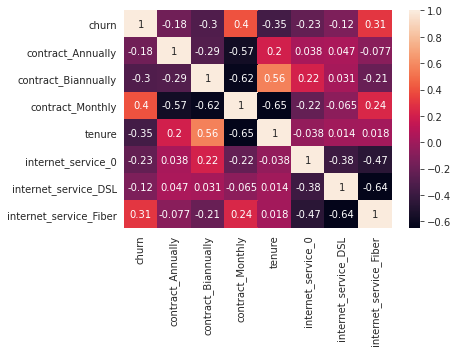

In [14]:
#Heatmap 
sns.heatmap(df_feri_new2[['churn','contract_Annually','contract_Biannually','contract_Monthly','tenure','internet_service_0','internet_service_DSL','internet_service_Fiber']].corr(),annot=True);

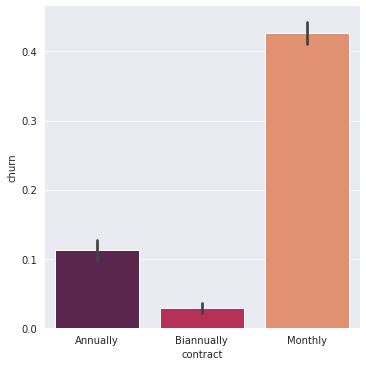

In [41]:
#Churn and length of contract 
df_feri_new['contract']=df_feri_new['contract'].astype('category')
sns.catplot(data=df_feri_new,x='contract',y='churn',kind='bar',palette='rocket');

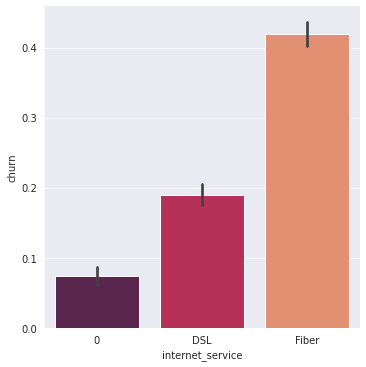

In [40]:
#Churn and type of internet service 
df_feri_new['internet_service']=df_feri_new['internet_service'].astype('category')
sns.catplot(data=df_feri_new,x='internet_service',y='churn',kind='bar',palette='rocket');

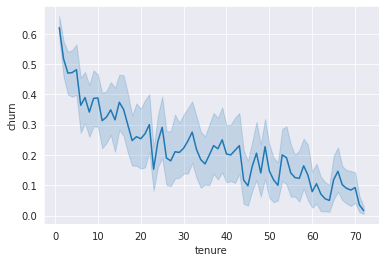

In [54]:
#Churn and tenure
sns.lineplot(data=df_feri_new2,x='tenure',y='churn');

In [42]:
#Split the data into train and test sets 
X=df_feri_new2[['tenure','contract_Monthly','internet_service_Fiber']]
y=df_feri_new2['churn']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=0)

In [47]:
#Train the linear regression model using training data
from xgboost import XGBClassifier
model = XGBClassifier(maxdepth=8)
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3, maxdepth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


#Predict churn using the linear regression model 
The regression model is then used to predict the total_rentals using the x_test set. The predicted results are stored in y_pred and compared to the actual results in y_test. 

In [49]:
#Predict total_rentals in test data using model
y_pred=model.predict(X_test)
df_compare=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_compare.head()

,Actual,Predicted
5552,0,0
5805,0,0
2640,0,0
3976,0,0
6429,0,0


In [51]:
 from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7923777019340159

Our model has 79% accuracy score with the 3 above-mentioned parameters. 